# Data Visualization

Sometimes looking at tables just doesn't cut it, sometimes we need visual aids.

Looking at Data in new ways allows us to see new relationships or patterns that aren't easy to see with just numbers.

Maybe you need to make a presentation to stakeholders, this is where Data visualization comes in.

There are many options to choose from to do data visualization in `Python`, some libraries are:

* Matplotlib
* Seaborn
* Bokeh
* Plotly
* Altair

They all have pros and cons, some of them, like Seaborn, are wrappers over matplotlib.

## Pie Chart

Pie charts are ubiquitous, you see them in college classes, quarterly reports, in the newspaper and even memes.

They are used to demonstrate proportion.

For this section, we will keep using pandas to aggregate our data and matplotlib to make charts.

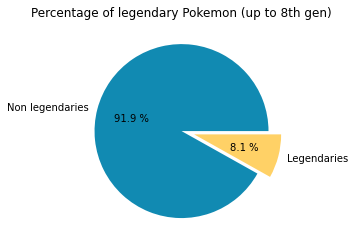

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# We import our data
df = pd.read_csv('datasets/pokemon.csv')

# Create a variable to store a Pandas series with our True and False count values
legendaries = df['Legendary'].value_counts(sort=True)

# Create labels and colors arrays
labels = ['Non legendaries', 'Legendaries']
colors = ['#118AB2','#FFD166']

# We create, personalize and show our pie chart
plt.pie(legendaries, explode=(0,0.15), labels = labels, colors = colors, autopct='%.1f %%')

# We give it a title
plt.title('Percentage of legendary Pokemon (up to 8th gen)')

# We print our pie chart
plt.show()

## Bar Chart

Bar charts describe values with bars or columns, they help us compare values against each other.

They also suffer from popularity and you will see them even when they aren't the best way to convey certain information.

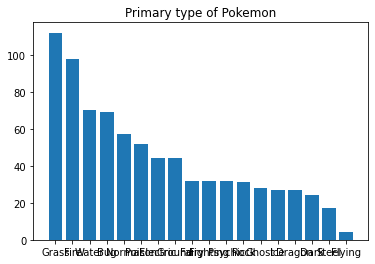

In [2]:
# We create the top-level container with fig while subplots creates the chart
fig, ax = plt.subplots()

# We select and filter our data (watch for compatible data types here)
types = df['Type 1'].unique()
counts = primarytype = df['Type 1'].value_counts(sort=True)

# We select our chart type and give it our data
ax.bar(types, counts, align='center')
ax.set_title('Primary type of Pokemon')

# We 'call' our chart
plt.show()

Oh, doesn't look good, let's try to do some changes:

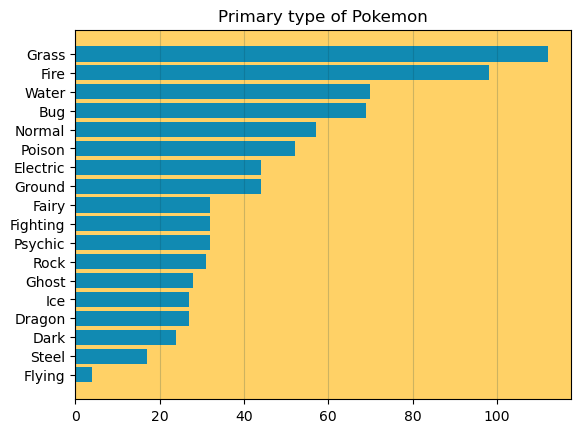

In [3]:
# Let's reset our styles (it's good practice to run it before every chart)
plt.rcdefaults()
fig, ax = plt.subplots()
types = df['Type 1'].unique()
counts = primarytype = df['Type 1'].value_counts(sort=True)

# Let's make it a horizontal bar chart instead, and add some color to the bars
ax.barh(types, counts, align='center', color = '#118AB2')
# We invert the axis because when we rotate it it changes the sort order
ax.invert_yaxis()
ax.set_title('Primary type of Pokemon')
# Change the background color
ax.set_facecolor('#FFD166')
# Add gridlines on the x axis, with a low opacity.
plt.grid(True, which='major', axis='x', alpha = 0.2, color = '#073B4C')
plt.show()

### Content Warning: number of deaths data

## Scatter and Line Plots

These type of charts are used to visualize numerical data through time, you probably have seen these kind of chart on financial reports or over the news.

Scatter plots are a little bit more complex in that they are also used to display the relationship between two variables or groups in the data. We can observe positive and negative correlations (*i.e.* if one increases the other also increases, one decreases then the other one too)

Let's see a small dataset, it shows the years and aggregated number of victims of homicides in Tijuana, México.

In [4]:
tj = pd.read_csv('datasets/tijuana_homicide.csv')
tj.head()

,YEAR,HOMICIDES
0,2006,314
1,2007,310
2,2008,577
3,2009,557
4,2010,688


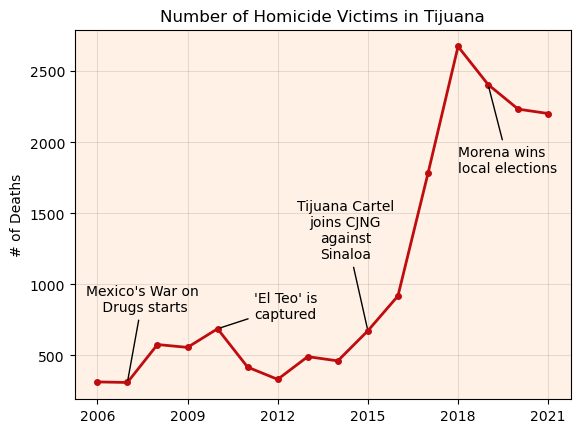

In [5]:
plt.rcdefaults()
fig, ax = plt.subplots()

plt.title("Number of Homicide Victims in Tijuana")
plt.plot(tj.YEAR,tj.HOMICIDES, '.-', color='#BF0C0F', linewidth=2, markersize=8)
plt.ylabel('# of Deaths')
# We're going to tick the grid on the X axis every three years
plt.xticks(tj.YEAR[::3])
plt.grid(True, which='major', axis='x', alpha = 0.1, color = '#000000')
plt.grid(True, which='major', axis='y', alpha = 0.1, color = '#000000')

ax.set_facecolor('#FFF1E5')

# Annotations
ax.annotate('Mexico\'s War on\n Drugs starts',
            xy = (2007,310), xytext=(2007.5,1000),
            arrowprops = dict(arrowstyle='-'), 
            xycoords='data', textcoords='data',
            horizontalalignment='center', verticalalignment='top')

ax.annotate('\'El Teo\' is\ncaptured',
            xy = (2010,688), xytext=(2012.25,950),
            arrowprops = dict(arrowstyle='-'), 
            xycoords='data', textcoords='data',
            horizontalalignment='center', verticalalignment='top')

ax.annotate('Tijuana Cartel\njoins CJNG\nagainst\nSinaloa',
            xy = (2015,674), xytext=(2014.25,1600),
            arrowprops = dict(arrowstyle='-'), 
            xycoords='data', textcoords='data',
            horizontalalignment='center', verticalalignment='top')

ax.annotate('Morena wins\nlocal elections',
            xy = (2019,2407), xytext=(2018,1980),
            arrowprops = dict(arrowstyle='-'), 
            xycoords='data', textcoords='data',
            horizontalalignment='left', verticalalignment='top')

plt.show()

### Scatter Plot

These charts have many uses and you can fit more than two variables, however most of the time are used to show correlation between two variables.

Here we have a dataset for Housing Prices in Delhi, taken from [Kaggle](https://www.kaggle.com/ruchi798/housing-prices-in-metropolitan-areas-of-india?select=Delhi.csv), let's see if there is any correlation between price and area.

In [6]:
de = pd.read_csv('datasets/delhi.csv')
de.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


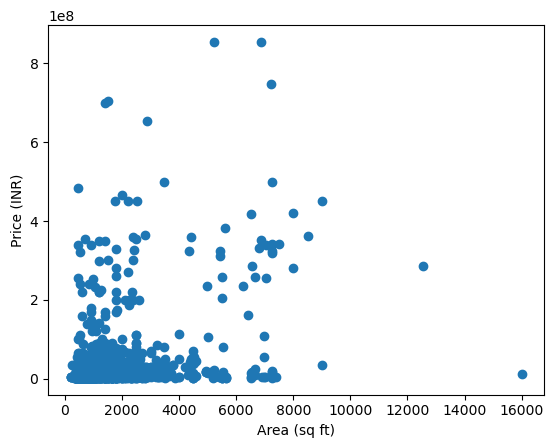

In [13]:
plt.scatter(de['Area'], de['Price'])
plt.ylabel('Price (INR)')
plt.xlabel('Area (sq ft)')
plt.show()

While we can see some clusters we can't identify any correlation right now, sometimes we need to redefine our questions and filter our data to get any insights from it.

## Histograms

Histograms look a lot like bar charts, they are different in that a histogram shows the frequency of a value in a dataset divided in ranges.

In [8]:
# We will use the pokemon dataset again
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


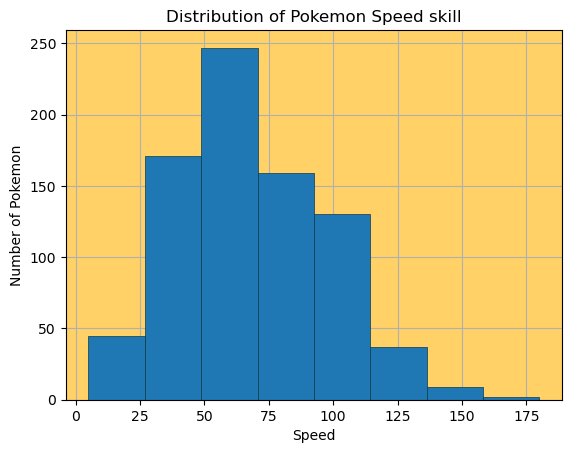

In [9]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.set_facecolor('#FFD166')

# We create the histogram, specify number of bins and line for each one
plt.hist(df.Speed, bins = 8, linewidth=0.5, edgecolor="#073B4C")

plt.title("Distribution of Pokemon Speed skill")
plt.ylabel('Number of Pokemon')
plt.xlabel("Speed")

# Let's show the gridline and make it so the grid doesn't show above the bars
ax.grid(True)
ax.set_axisbelow(True)

plt.show()

## Box Plots

You may remember our friend from notebook \#2, this chart show us the five number summary:

* Minimum
* First quartile
* Median
* Third quartile
* Maximum

The 'box' portion show us the interquartile range or where 50% of the data is.

The small circles outside the 'whiskers' are outliers, i.e. extreme values in the dataset, always remember to check why those values are in the dataset before making a chart or even if you should include them, as they can pull the average quite a lot sometimes. 

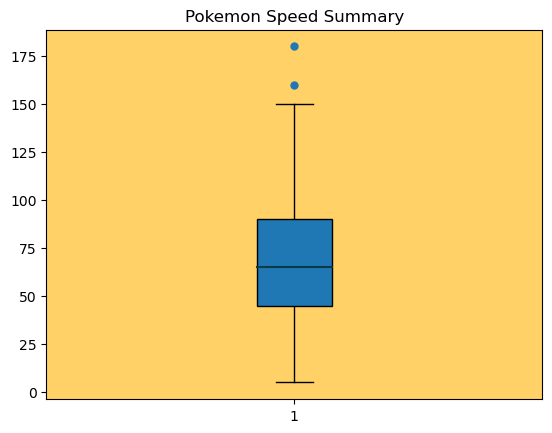

In [10]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.set_facecolor('#FFD166')

# We create our box plot and pass attributes for customization 
# of median and outliers
ax.boxplot(df.Speed,patch_artist=True,
           medianprops=dict(color='#073B4C',linewidth=1.5),
           flierprops = dict(markerfacecolor='C0', markeredgecolor='none'))
ax.set_title('Pokemon Speed Summary')

plt.show()